In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from numpy.random import *
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Generate synthetic number

In [74]:
from models import Models
from models_dict_v2 import model_dict
from generate_synthetic_df import generate_synthetic_df

npol = 100
nper = 5

# Create synthetic dataframe
df = generate_synthetic_df(npol*nper, 0)

# Instantiate an object from the class "Models"
models = Models(model_dict)

# Calculate the cost and price
cost = models.calculate_cost(df)
pricing = models.calculate_pricing(df)

# Calculate the profit on the synthetic dataframe
df["profit"] = models.calculate_profit(cost, pricing)

# Create identification variable
df["id"] = np.tile(np.arange(npol), nper)

# Create time period variable
df["time"] = np.repeat(np.arange(nper), npol)

# Do one-hot encoding on the categorical variables
df = pd.get_dummies(df)
df = df.drop("MARITAL_STATUS_Not_Single", axis=1)

In [108]:
df.head()

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time,MARITAL_STATUS_Single,state
0,24348,34,18,14249,True,False,0,0,29.249696,0,0,0,1
1,14801,56,0,33846,False,False,0,1,-24.538513,1,0,1,4
2,18851,41,0,6807,False,False,0,0,-19.239470,2,0,0,0
3,27686,29,12,5909,False,False,0,0,-37.844592,3,0,1,0
4,25072,49,0,13917,False,False,0,0,1.309595,4,0,0,0


In [76]:
# slipt to X and y variables
y = df["profit"]
X = df.drop(["profit","id","time"], axis = 1)

## Train the decision tree

In [78]:
reg_tree = DecisionTreeRegressor(max_depth=3)  # You can adjust hyperparameters like max_depth


In [79]:
#reg_tree.fit(X_train, y_train)

reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

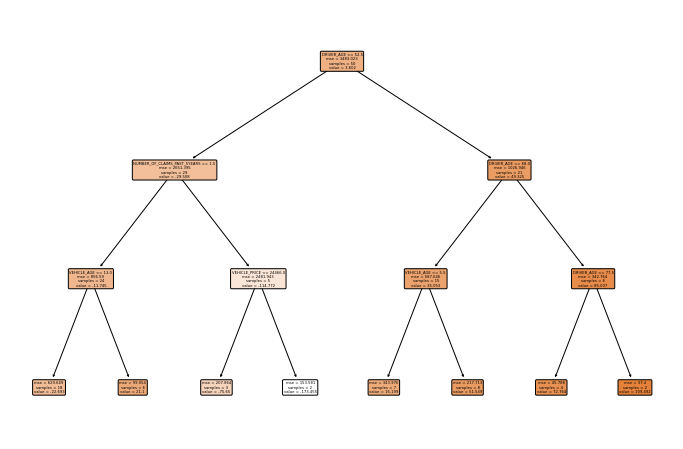

In [80]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

In [65]:
#leaves = reg_tree.apply(X)
#df["state"] = leaves

In [84]:
def get_leaf_indices(tree):
#    """ Return the indices of the leaf nodes in the decision tree. """
    return np.where(tree.tree_.children_left == tree.tree_.children_right)[0]

# Get the leaf node indices for the trained regressor

states = get_leaf_indices(reg_tree)
print(f"Leaf Nodes states: {states}")


Leaf Nodes states: [ 3  4  6  7 10 11 13 14]


In [85]:
def extract_leaf_values(regressor):
    # Return the values in the leaves of the decision tree
    return regressor.tree_.value.squeeze()


Profit_Vector = extract_leaf_values(reg_tree)

Profit_Vector

array([   3.60179779,  -29.50817206,  -11.74484406,  -22.69305668,
         21.0997938 , -114.77214647,  -75.65017829, -173.45509874,
         49.32508949,   35.05251222,   16.19939817,   51.54898701,
         85.00653268,   72.76373701,  109.49212403])

In [86]:
# apply to each client into each state

def get_state(x, regressor, states):
    x_leaf_id = regressor.apply(x)
    x_states = np.empty(len(x), dtype = np.uint16)
    for k in range(len(x)):
        x_states[k] = np.where(states == x_leaf_id[k])[0][0]
    return x_states

df["state"] = get_state(X, reg_tree, states)
df

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time,MARITAL_STATUS_Single,state
0,24348,34,18,14249,True,False,0,0,29.249696,0,0,0,1
1,14801,56,0,33846,False,False,0,1,-24.538513,1,0,1,4
2,18851,41,0,6807,False,False,0,0,-19.239470,2,0,0,0
3,27686,29,12,5909,False,False,0,0,-37.844592,3,0,1,0
4,25072,49,0,13917,False,False,0,0,1.309595,4,0,0,0
5,5159,57,18,7701,True,False,0,0,66.721453,5,0,0,5
6,18650,51,4,27392,False,False,0,0,-19.708097,6,0,1,0
7,10940,55,2,3120,False,False,0,0,31.973114,7,0,0,4
8,11277,39,18,2377,False,False,0,0,23.496000,8,0,1,1
9,14874,43,15,10183,False,False,0,0,34.936920,9,0,0,1


In [87]:
df['state'].unique()

array([1, 4, 0, 5, 3, 2, 6, 7], dtype=uint16)

# step 3: create matrix transition


In [88]:
# convert this table to pivot 
pivot_df = df.pivot(index='id', columns='time', values='state')
pivot_df




time,0,1,2,3,4
id,,,,,
0,1,1,5,0,2
1,4,0,0,5,6
2,0,3,6,4,5
3,0,2,1,0,5
4,0,4,4,6,5
5,5,0,0,7,5
6,0,0,0,6,2
7,4,5,1,0,7
8,1,3,0,0,0


In [89]:
# construct transition matrix 
# Create a matrix filled with zeros
# Get unique states
#values = np.unique(leaves)
prob = pd.DataFrame(0, index = np.arange(len(states)), columns = np.arange(len(states)))
for j in range(len(pivot_df.index)):
    trans = pivot_df.loc[j]
    for k in range(len(trans) - 1): prob.iat[trans[k], trans[k+1]] += 1
prob = prob.div(prob.sum(axis=1), axis=0)


In [90]:
prob

,0,1,2,3,4,5,6,7
0,0.411765,0.000000,0.117647,0.058824,0.117647,0.117647,0.058824,0.117647
1,0.500000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
4,0.166667,0.000000,0.000000,0.000000,0.333333,0.333333,0.166667,0.000000
5,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000



## step4: simulation the path of states to compute the CLV

In [95]:
def CLV_traj(a, gam, p_client):
    CLV = 0
    St = a
    t = 0
    while True:
        c = rand()
        if c > p_client: break
        else :
            t += 1
            probs = prob.loc[St]
            St = choice(len(probs), 1, p = probs)[0]
            CLV += gam**t*Profit_Vector[St]
    return(CLV)

In [106]:
## Simulate N trajectories

def CLV_MC(N, a, gam, p_client):
    CLV_vec = []
    for i in range(N): CLV_vec.append(CLV_traj(a, gam, p_client))
    return(CLV_vec)

CLV=[]
CLV.append(CLV_MC(3000, 0, 1/1.15, 0.85))
CLV.append(CLV_MC(3000, 1, 1/1.15, 0.85))
CLV.append(CLV_MC(3000, 2, 1/1.15, 0.85))

(array([ 10.,  19.,  85., 117., 230., 278., 390., 322., 971., 578.]),
 array([-416.41349187, -372.37534989, -328.3372079 , -284.29906592,
        -240.26092393, -196.22278195, -152.18463996, -108.14649798,
         -64.108356  ,  -20.07021401,   23.96792797]),
 <BarContainer object of 10 artists>)

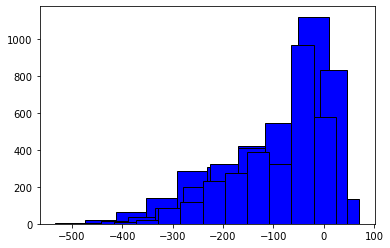

In [107]:
import matplotlib.pyplot as plt

plt.hist(CLV[0], bins=10, color='blue', edgecolor='black')

plt.hist(CLV[1], bins=10, color='blue', edgecolor='black')

plt.hist(CLV[2], bins=10, color='blue', edgecolor='black')